In [1]:
%load_ext autoreload
%autoreload 2

import torch
from text3d2video.utilities.camera_placement import turntable_extrinsics
from text3d2video.utilities.mesh_processing import normalize_meshes
from pytorch3d.io import load_obj, load_objs_as_meshes
from pytorch3d.renderer import FoVPerspectiveCameras

mesh_path = "data/meshes/mixamo-human.obj"
device = "cuda"

# read mesh
verts, faces, aux = load_obj(mesh_path)
verts_uvs = aux.verts_uvs.to(device)
faces_uvs = faces.textures_idx.to(device)

mesh = load_objs_as_meshes([mesh_path], device=device)
mesh = normalize_meshes(mesh)

R, T = turntable_extrinsics(dists=1, angles=0, elev=0)
camera = FoVPerspectiveCameras(device=device, R=R, T=T, fov=60)

/home/jorge/miniconda3/envs/thesis4/lib/python3.9/site-packages/pytorch3d/io/obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


True

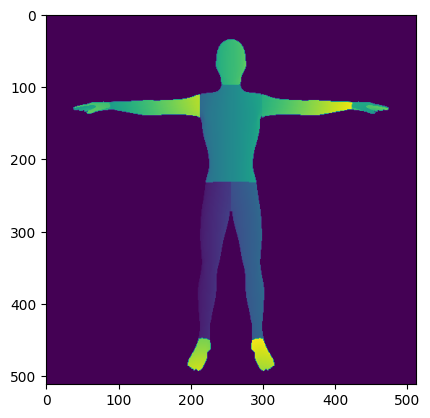

In [12]:
from text3d2video.rendering import make_mesh_rasterizer
from pytorch3d.ops import interpolate_face_attributes
import matplotlib.pyplot as plt

rasterizer = make_mesh_rasterizer()

fragments = rasterizer(mesh, cameras=camera)

faces_verts_uvs = verts_uvs[faces_uvs]  

pixel_uvs = interpolate_face_attributes(
    fragments.pix_to_face, fragments.bary_coords, faces_verts_uvs
)[0, :, :, 0, :]

plt.imshow(pixel_uvs[:, :, 0].detach().cpu())